# __1. Importing Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# __2. Dataset Overview__

In [2]:
raw_data = pd.read_csv('./batting_data.csv')

In [3]:
raw_data.head()

,Unnamed: 0,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,X4s,X6s
0,0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8
1,1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30
2,2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,0,3,5
3,3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5
4,4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6


In [4]:
raw_data = raw_data.drop(columns=['Unnamed: 0'])

In [5]:
raw_data.shape

(100, 13)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  100 non-null    object 
 1   Mat.x   100 non-null    int64  
 2   Inns.x  100 non-null    int64  
 3   NO      100 non-null    int64  
 4   Runs.x  100 non-null    int64  
 5   HS      100 non-null    int64  
 6   Avg.x   100 non-null    object 
 7   BF      100 non-null    int64  
 8   SR.x    100 non-null    float64
 9   X100    100 non-null    int64  
 10  X50     100 non-null    int64  
 11  X4s     100 non-null    int64  
 12  X6s     100 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 10.3+ KB


In [7]:
raw_data.describe()

,Mat.x,Inns.x,NO,Runs.x,HS,BF,SR.x,X100,X50,X4s,X6s
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,10.420000,8.600000,1.790000,189.260000,47.410000,135.890000,133.162000,0.050000,1.010000,16.390000,8.680000
std,4.472542,4.572646,1.683521,182.454235,27.987044,123.063414,33.044126,0.261116,1.642215,17.852875,9.382856
min,1.000000,1.000000,0.000000,13.000000,7.000000,5.000000,71.420000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,1.000000,50.000000,25.500000,38.750000,115.860000,0.000000,0.000000,3.000000,1.000000
50%,11.000000,8.000000,1.000000,120.000000,44.500000,88.000000,132.790000,0.000000,0.000000,8.000000,5.000000
75%,14.000000,13.000000,3.000000,284.500000,65.000000,197.750000,149.525000,0.000000,1.000000,23.250000,11.250000
max,17.000000,17.000000,9.000000,735.000000,128.000000,516.000000,300.000000,2.000000,8.000000,68.000000,37.000000


# __3. Data Preperation__

In [8]:
data = raw_data.copy(deep=True)

In [9]:
data.columns = data.columns.str.capitalize()

In [10]:
data.columns = data.columns.str.replace('.x', '')

In [11]:
data.columns

Index(['Player', 'Mat', 'Inns', 'No', 'Runs', 'Hs', 'Avg', 'Bf', 'Sr', 'X100',
       'X50', 'X4s', 'X6s'],
      dtype='object')

In [12]:
data = data.replace(to_replace='-', value=np.nan)

In [13]:
data['Avg'] = data['Avg'].astype('float64')

# __4. Data Preprocessing__

In [14]:
numcols = data.select_dtypes(include=['int64', 'float64']).columns

In [15]:
data.isnull().sum()

Player    0
Mat       0
Inns      0
No        0
Runs      0
Hs        0
Avg       3
Bf        0
Sr        0
X100      0
X50       0
X4s       0
X6s       0
dtype: int64

In [16]:
# data['Avg'].fillna(value=data['Avg'].mean, inplace=True)

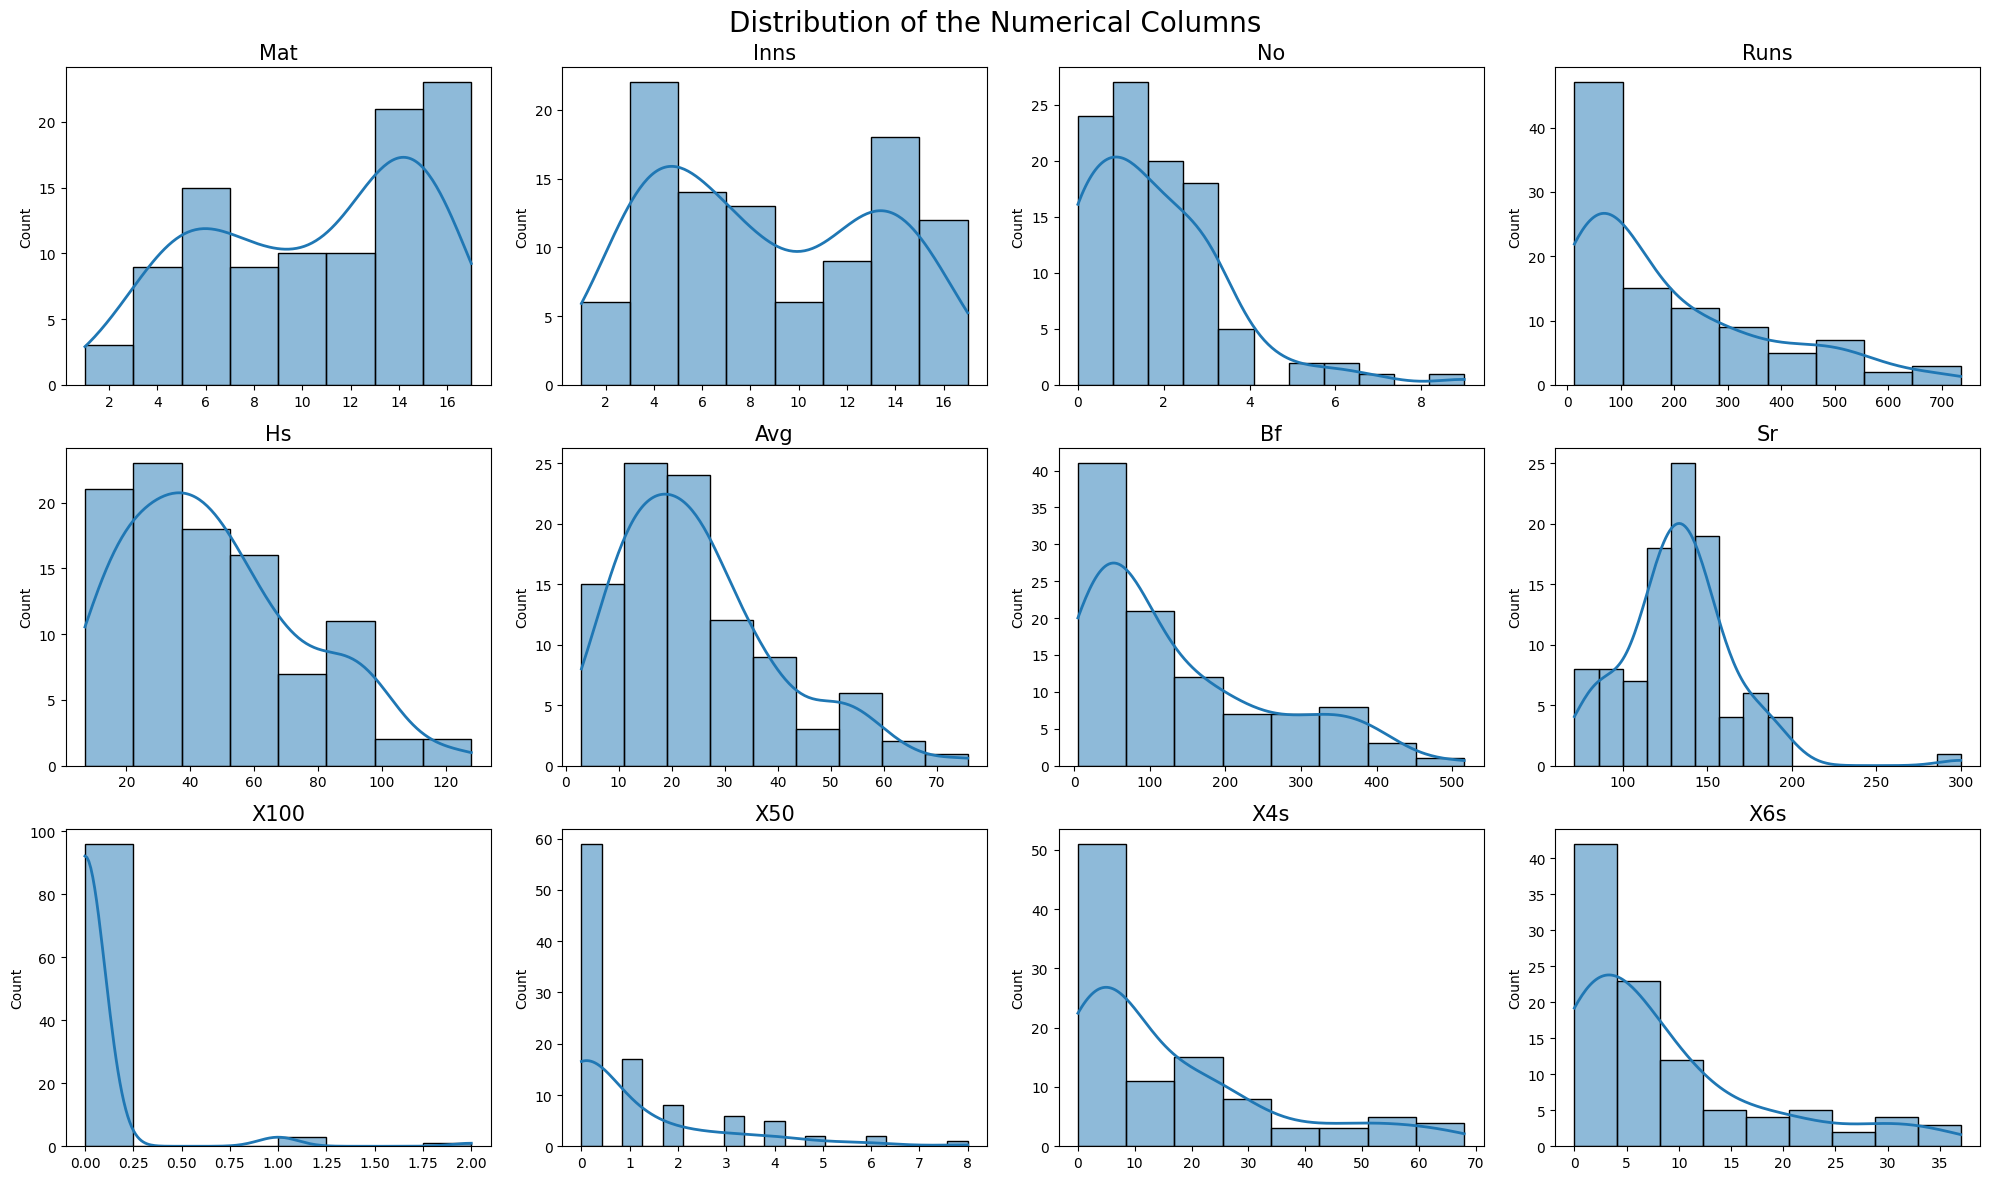

In [17]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20,12))
axes = axes.flat
for index, column in enumerate(numcols):
    sns.histplot(
        data=data,
        x=column,
        stat='count',
        kde=True,
        line_kws={'linewidth':2},
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(column, size=15)
plt.suptitle('Distribution of the Numerical Columns', size=20)
plt.tight_layout()
plt.show()

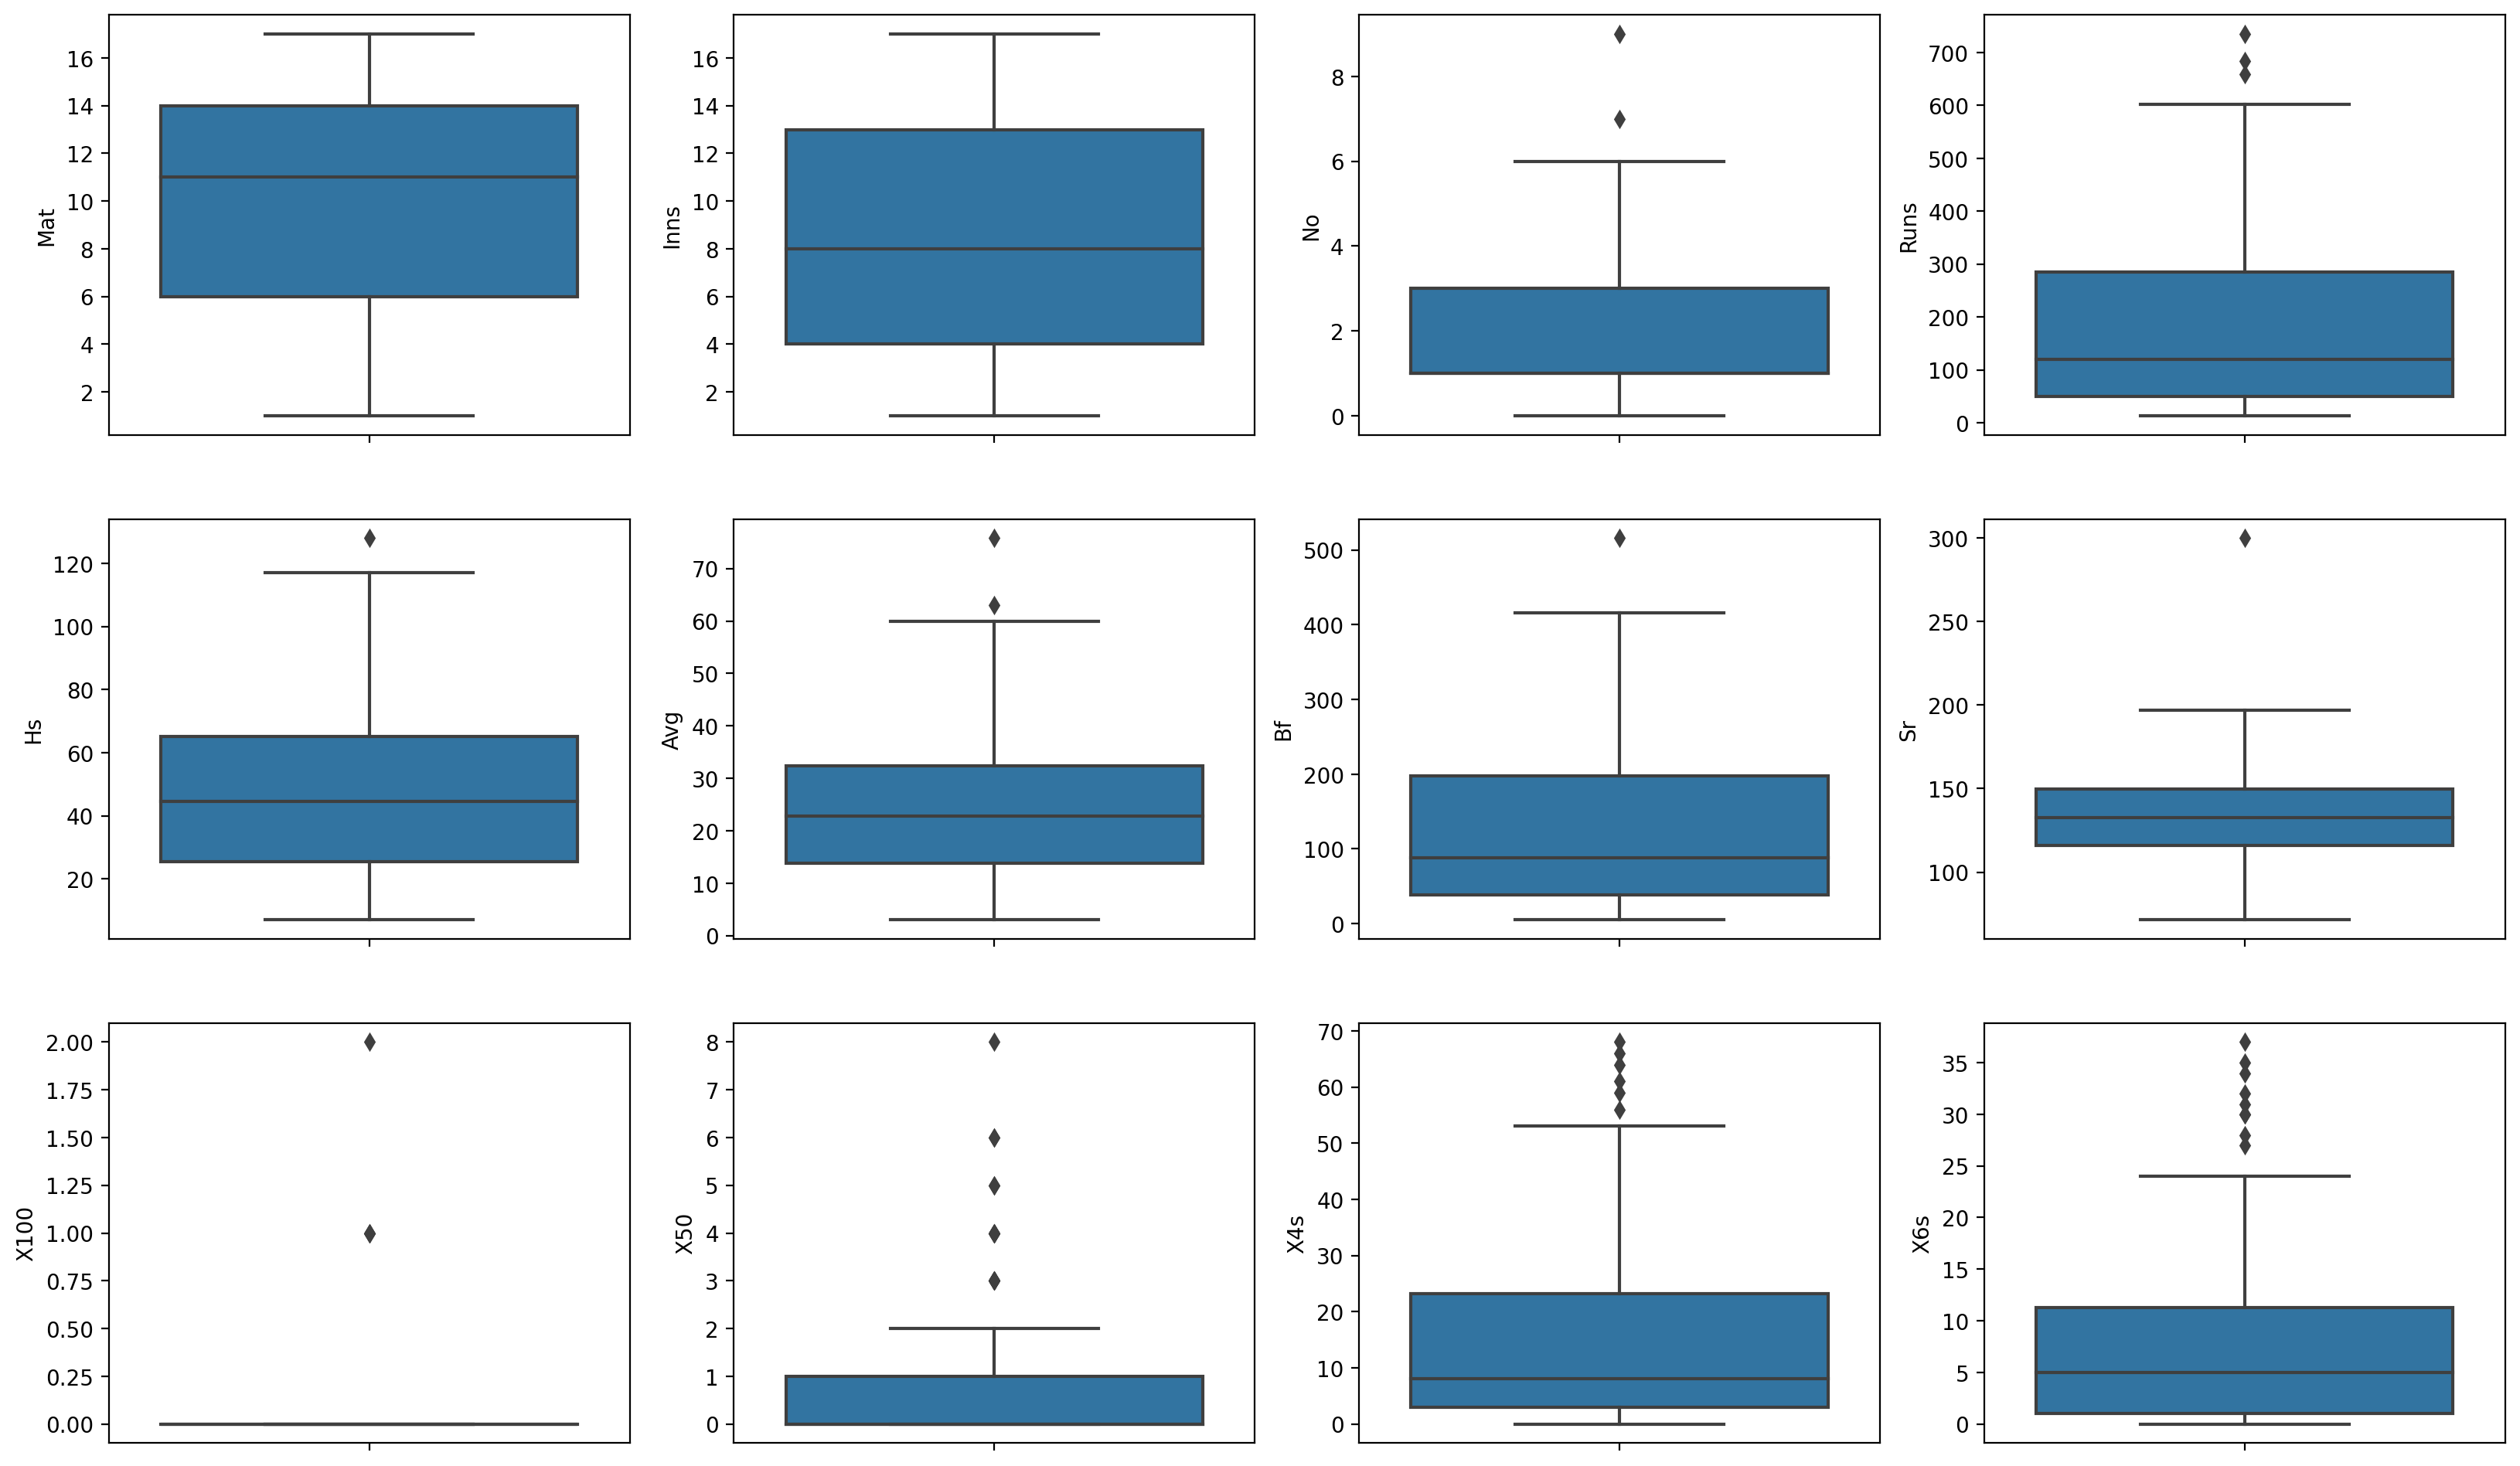

In [18]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20,12), dpi=200)
axes = axes.flat

for index, column in enumerate(numcols):
    sns.boxplot(
        data=data,
        y=column,
        ax=axes[index]
    )

Skewness of Mat: -0.3049115324015878
Skewness of Inns: 0.17554848957293087
Skewness of No: 1.4401650261237993
Skewness of Runs: 1.1656249201023534
Skewness of Hs: 0.6480668575669943
Skewness of Avg: 1.011911247132562
Skewness of Bf: 1.0691271817299899
Skewness of Sr: 1.2133517991815885
Skewness of X100: 5.77495715789537
Skewness of X50: 1.966530564325549
Skewness of X4s: 1.361772290036023
Skewness of X6s: 1.403418952271727


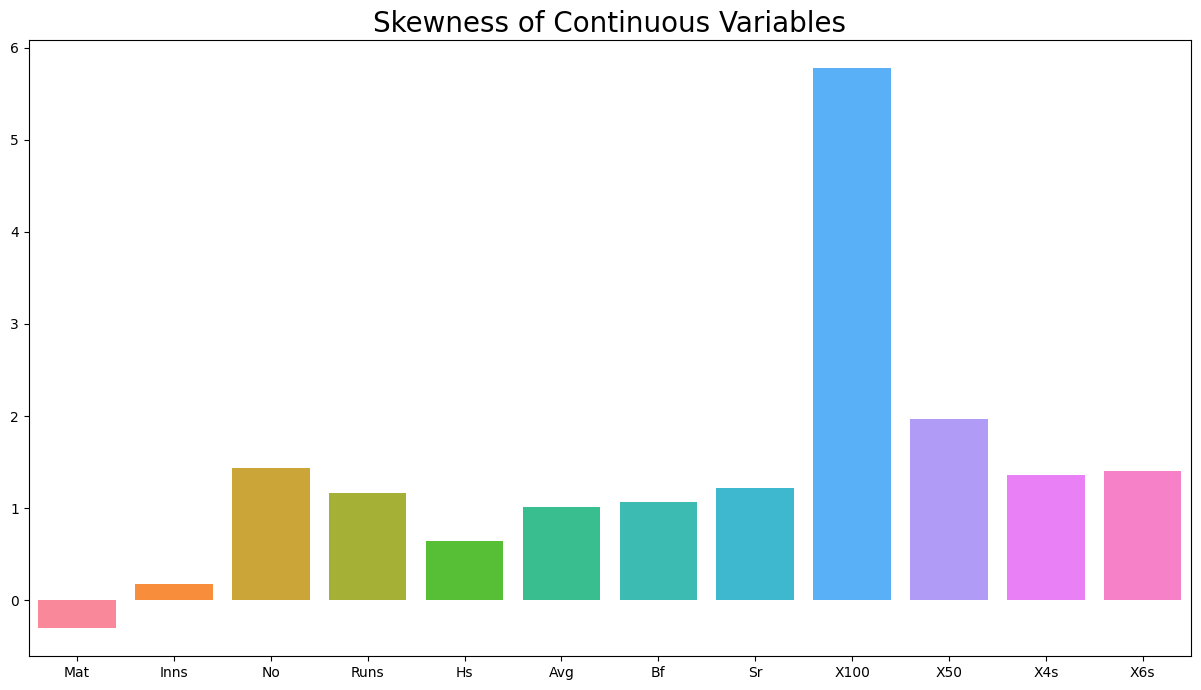

In [19]:
skew = {}
for col in data[numcols]:
    skewness = data[col].skew()
    skew[col]=skewness
    print(f"Skewness of {col}: {skewness}")

plt.figure(figsize=(15,8))
sns.barplot(x=list(skew.keys()), y=list(skew.values()), saturation=2)
plt.title("Skewness of Continuous Variables", fontsize=20)
plt.show()

<Figure size 1500x800 with 0 Axes>

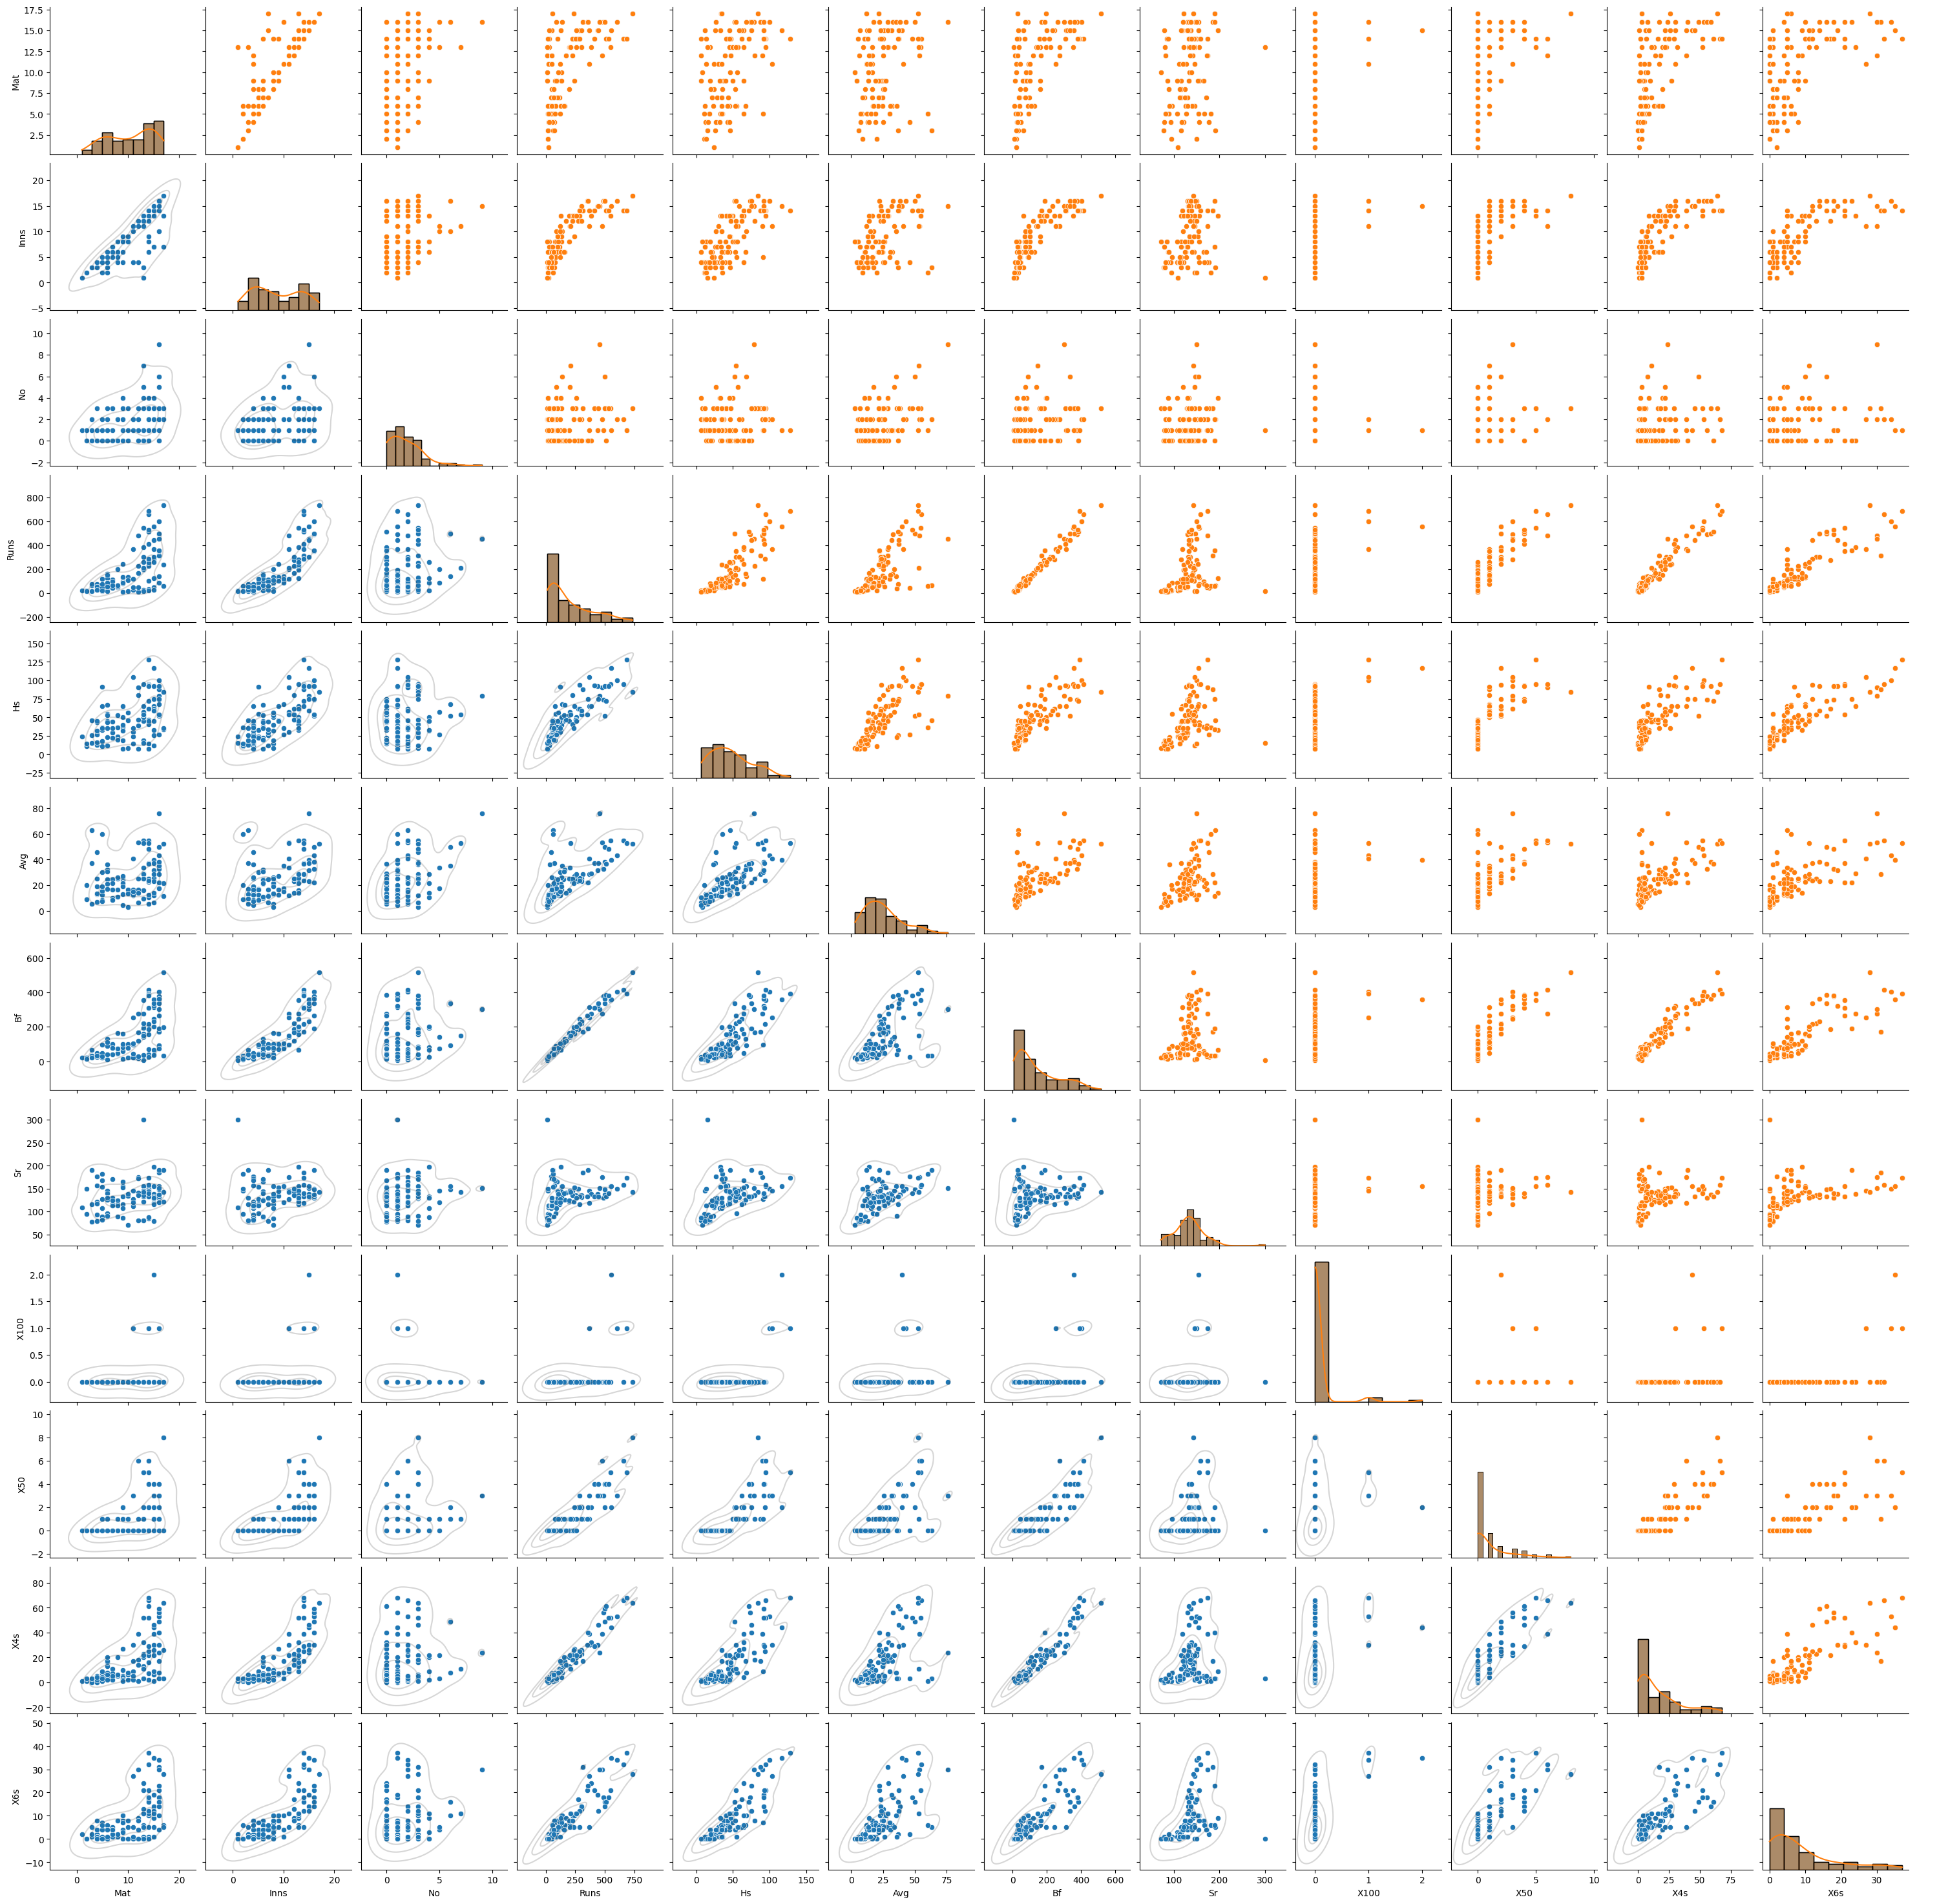

In [20]:
plt.figure(figsize=(15,8))
graph = sns.pairplot(data=data)
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot, levels=4, color=.2)
graph.map_diag(sns.histplot, kde=True)
graph.add_legend()

In [21]:
data.corr().style.background_gradient('plasma')

,Mat,Inns,No,Runs,Hs,Avg,Bf,Sr,X100,X50,X4s,X6s
Mat,1.000000,0.817313,0.419649,0.621583,0.459063,0.235601,0.627702,0.229214,0.163470,0.464256,0.579464,0.552993
Inns,0.817313,1.000000,0.331445,0.854712,0.715055,0.443015,0.866806,0.202235,0.236876,0.648895,0.804345,0.758132
No,0.419649,0.331445,1.000000,0.194659,0.101962,0.435336,0.182913,0.098253,-0.044807,0.143256,0.099879,0.182424
Runs,0.621583,0.854712,0.194659,1.000000,0.859565,0.689465,0.987540,0.288853,0.385389,0.892745,0.965879,0.899565
Hs,0.459063,0.715055,0.101962,0.859565,1.000000,0.676974,0.831596,0.389671,0.454677,0.784726,0.800926,0.854788
Avg,0.235601,0.443015,0.435336,0.689465,0.676974,1.000000,0.652837,0.542230,0.238250,0.656375,0.614654,0.669347
Bf,0.627702,0.866806,0.182913,0.987540,0.831596,0.652837,1.000000,0.206185,0.341548,0.873875,0.960262,0.841958
Sr,0.229214,0.202235,0.098253,0.288853,0.389671,0.542230,0.206185,1.000000,0.131994,0.233898,0.250981,0.403443
X100,0.163470,0.236876,-0.044807,0.385389,0.454677,0.238250,0.341548,0.131994,1.000000,0.234382,0.340299,0.513705
X50,0.464256,0.648895,0.143256,0.892745,0.784726,0.656375,0.873875,0.233898,0.234382,1.000000,0.871870,0.781615


Text(0.5, 0.98, 'Correlation in heatmap')

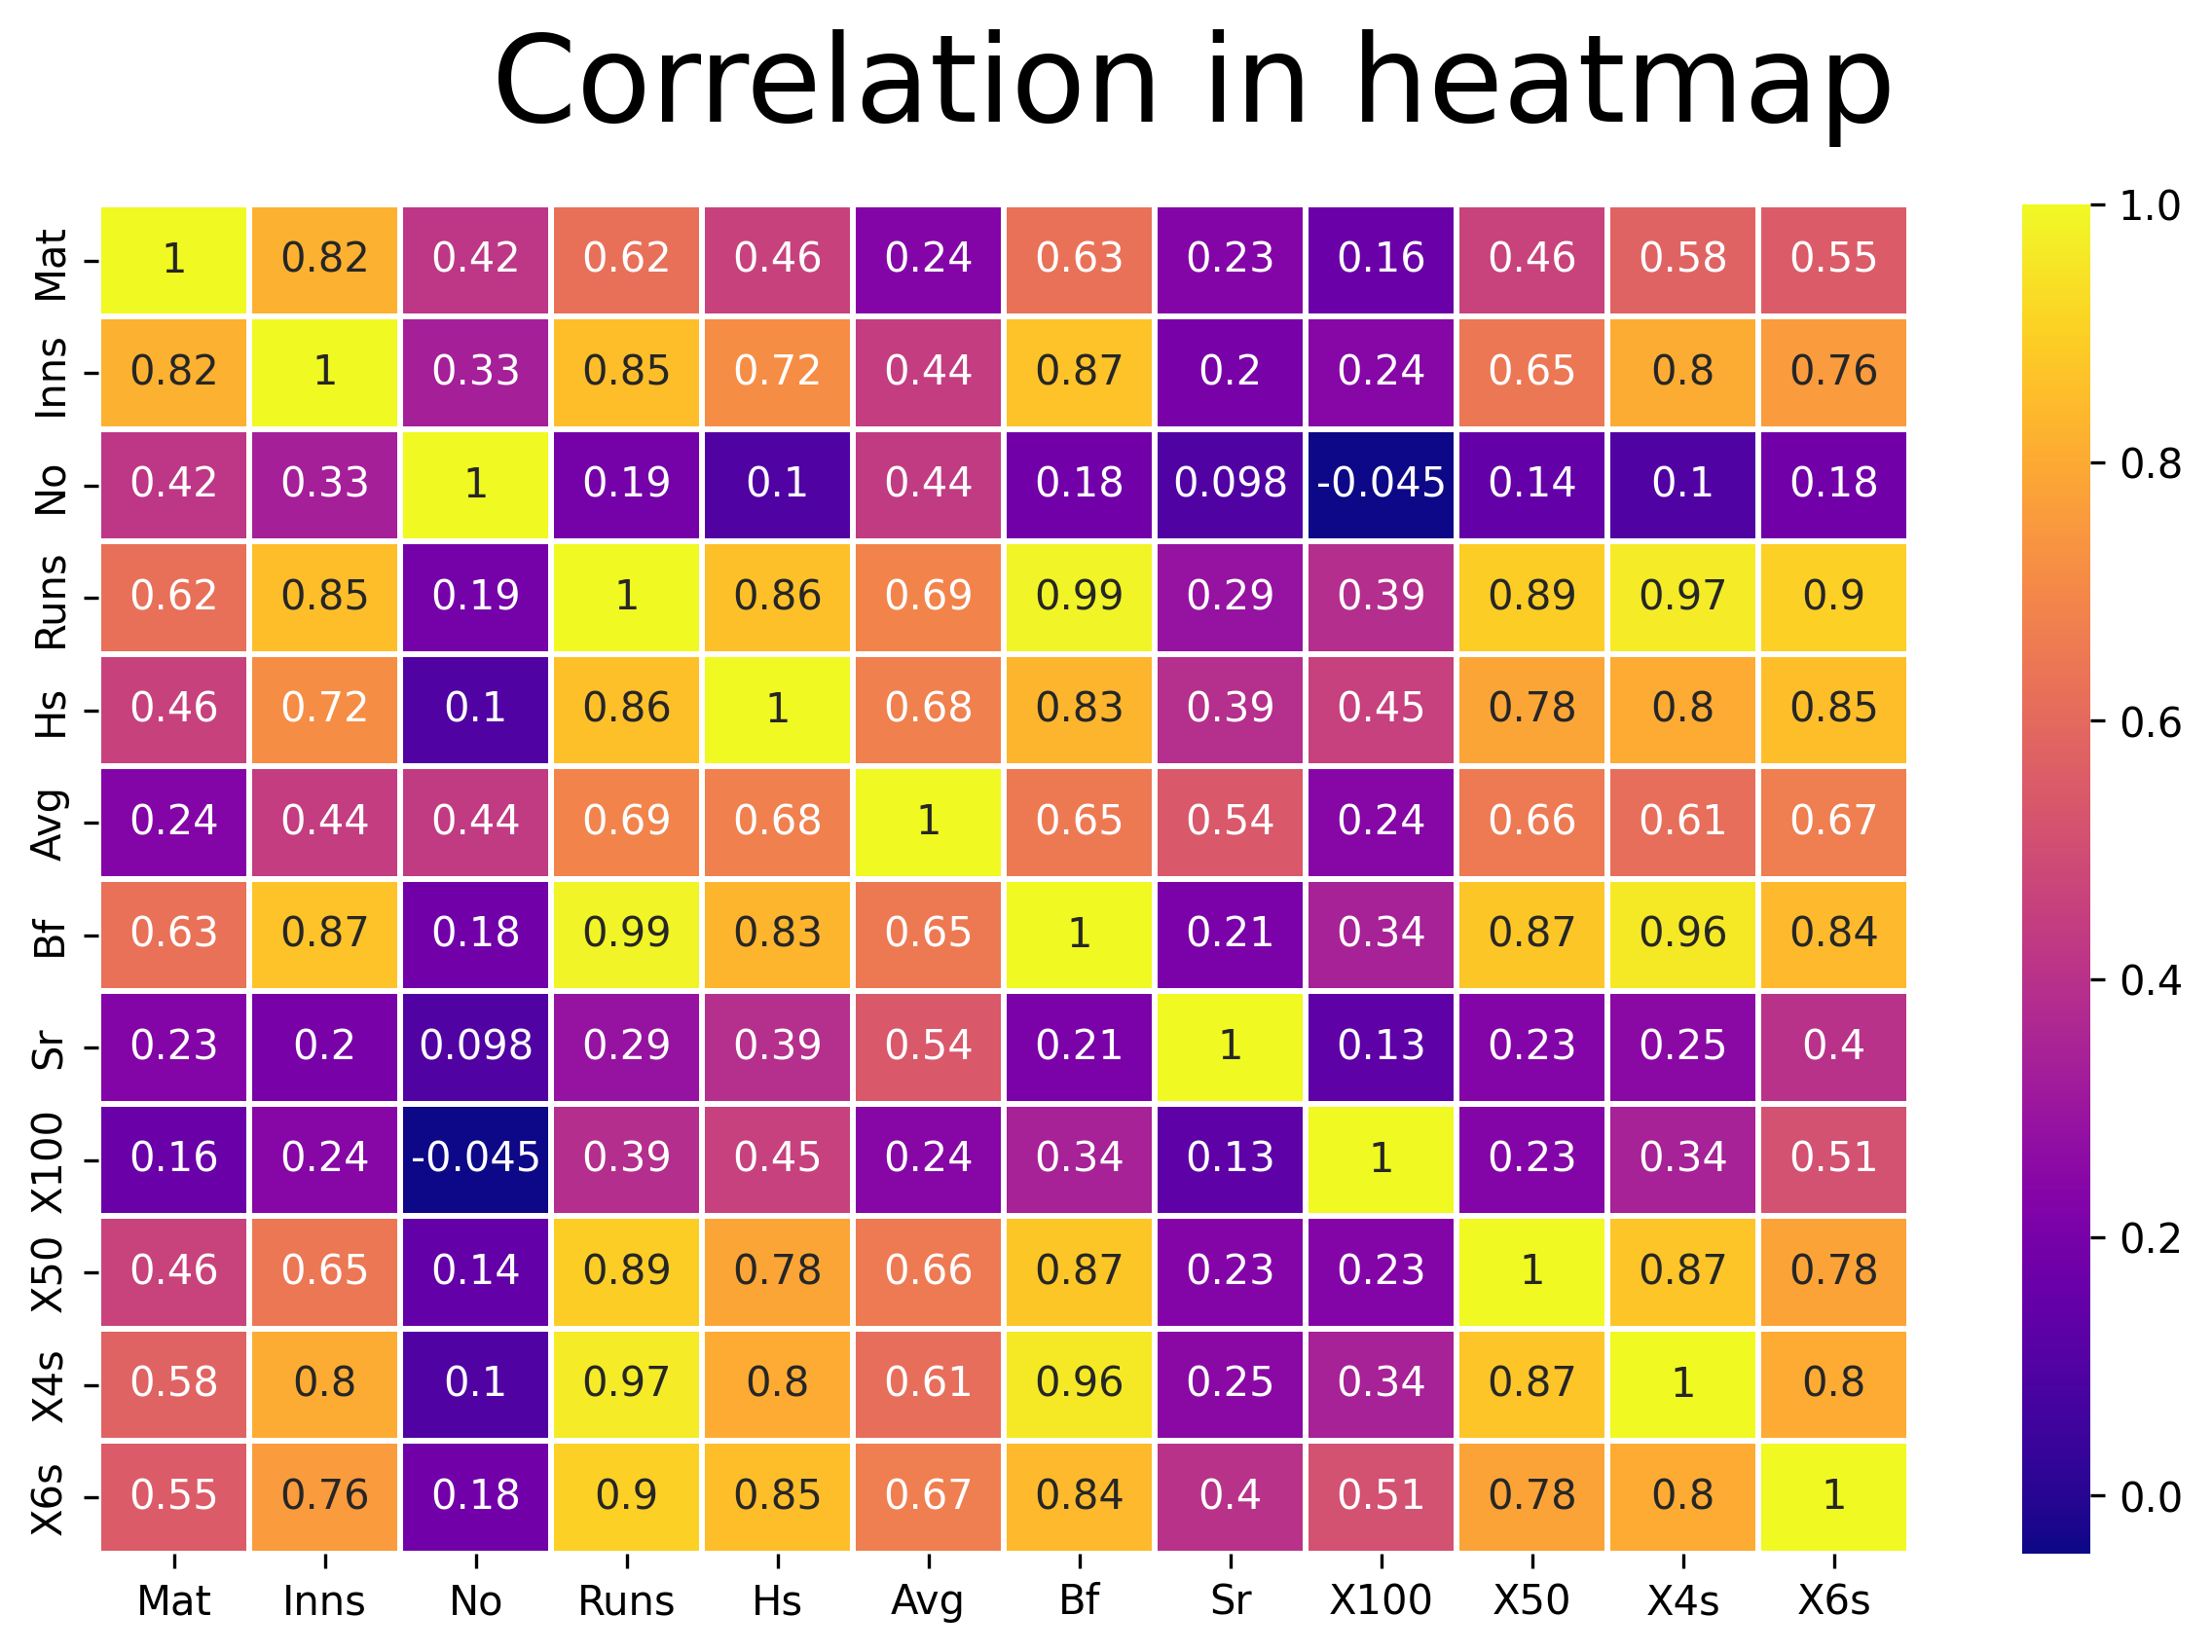

In [22]:
# Using heatmap to find correlation
plt.figure(figsize=(10,6), dpi=300)
sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap='plasma', 
    linewidth=True
)
plt.suptitle('Correlation in heatmap', size=30)